In [1]:
library ("igraph")
library('igraph')
library('Matrix')
library('plyr')


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
g = read_graph("weights_day.txt", format="ncol")
bad_companies = list("CFG", "CSRA", "FTV", "HPE", "KHC", "PYPL", "QRVO", "SYF", "UA", "WLTW", "WRK")
w = E(g)$weight

#### Question 2
In this part,we construct a correlation graph using the correlation coefficient computed in the
previous section. The correlation graph has the stocks as the nodes and the edge weights are
given by the following expression wij = (2(1-p_ij))^0.5

Plot a histogram showing the un-normalized distribution of edge weights.

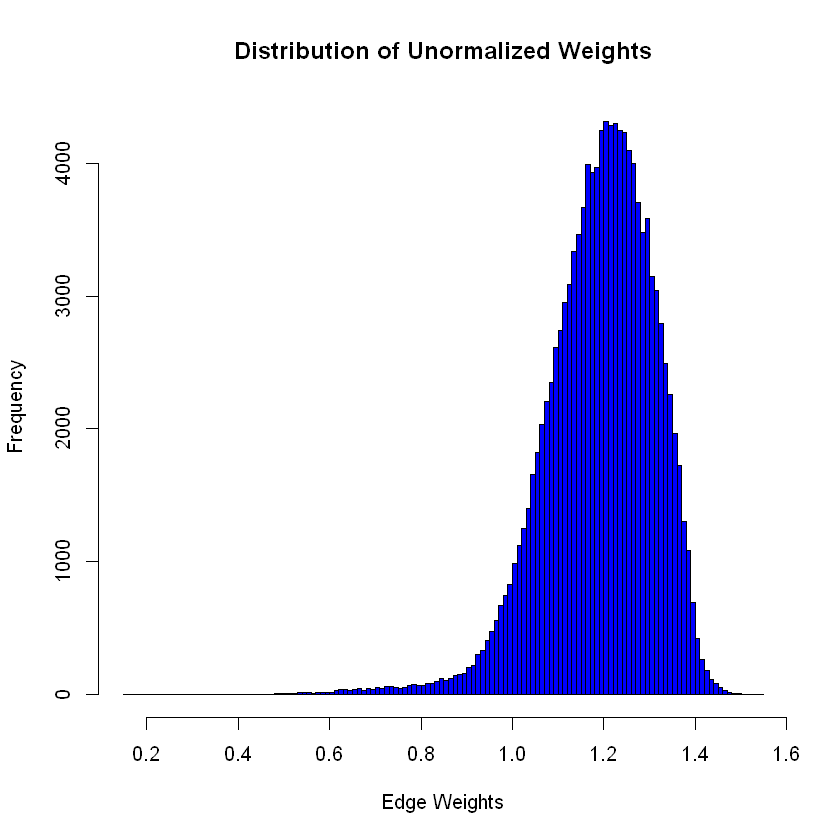

In [3]:
hist(w, col='blue', breaks=100, main='Distribution of Unormalized Weights', xlab='Edge Weights')

#### Question 3
Extract the MST of the correlation graph. Each stock can be categorized into
a sector, which can be found in Name sector.csv file. Plot the MST and color-code the nodes
based on sectors. Do you see any pattern in the MST? The structures that you find in MST are
called Vine clusters. Provide a detailed explanation about the pattern you observe.

In [4]:
mst_g = mst(g, weights=w)
colors = list("Health Care", "Industrials", "Consumer Discretionary",
              "Information Technology", "Consumer Staples", "Utilities",
              "Financials", "Real Estate", "Materials",
              "Energy", "Telecommunication Services")

In [5]:
remove_bad_companies <- function(string){
    if (!(string[1] %in% bad_companies)){
        return (string)
    }else{
        return ("BAD")
    }
}


cat2int  <- function(x){
    return (match(x, colors))
}

sectors = readLines("finance_data/finance_data/Name_sector.csv", skip=1)
sectors = strsplit(sectors, ",")
sectors = sectors[2:length(sectors)]
sectors = lapply(sectors, remove_bad_companies)
sectors = sectors[sectors != "BAD"]
tickers = lapply(sectors, "[[", 1)
category = lapply(sectors, "[[", 2)
int_category = lapply(category, cat2int)
V(mst_g)$color = int_category

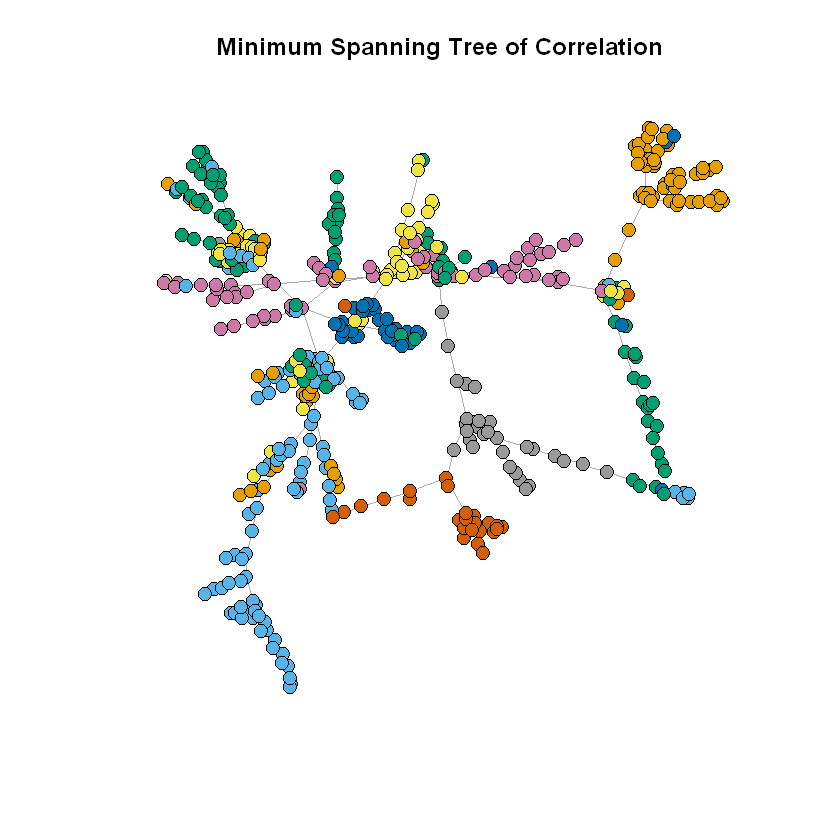

In [6]:
map_color <- unlist(V(mst_g)$color)
plot(mst_g, edge.arrow.size=.5, 
        vertex.color=map_color, vertex.size=5, vertex.label="", #mark.col = seq(1:max(cinfo_map_color)),
    main=paste("Minimum Spanning Tree of Correlation ",collapse=""))

#### Question 4
Report the value of alpha for the above two cases and provide an interpretation for
the difference.

In [7]:
get_alphas = function(mst_g){
    Pq_sum <- 0
    Ps_sum <- 0 
    nodes = V(mst_g)
    for (i in 1:length(nodes)){
        node = V(mst_g)[[i]]
        neighbors_stock = neighbors(mst_g, node)
        num_neighbors = length(neighbors_stock)
        match_stock = neighbors_stock[neighbors_stock$color == node$color]
        P = (length(match_stock) / num_neighbors)
        Pq_sum = Pq_sum + P
        Ps_sum = Ps_sum + (length(nodes[nodes$color == node$color])/length(nodes))
    }
    alpha_q = Pq_sum/ length(V(mst_g))
    alpha_s = Ps_sum /  length(V(mst_g))
    return (list("alpha_q"=alpha_q, "alpha_s"=alpha_s))
}
ret = get_alphas(mst_g)
alpha_q = ret$alpha_q
alpha_s = ret$alpha_s
alpha_q
alpha_s

[1] 0.8289301

[1] 0.1141881

### 5
In the previous parts, we constructed the correlation graph based on daily data. In this part of
the project, we will construct a correlation graph based on weekly data. To create the graph,
sample the stock data weekly on Mondays and then calculate Pij using the sampled data. If
there is a holiday on a Monday, we ignore that week. Create the correlation graph based on
weekly data.
#### QUESTION 5: 
Extract the MST from the correlation graph based on weekly data. Compare the
pattern of this MST with the pattern of the MST found in Question 3.

In [169]:
g_week = read_graph("weights_week.txt", format="ncol")
w_week = E(g_week)$weight
mst_week = mst(g_week, weights=w_week)
V(mst_week)$color = int_category

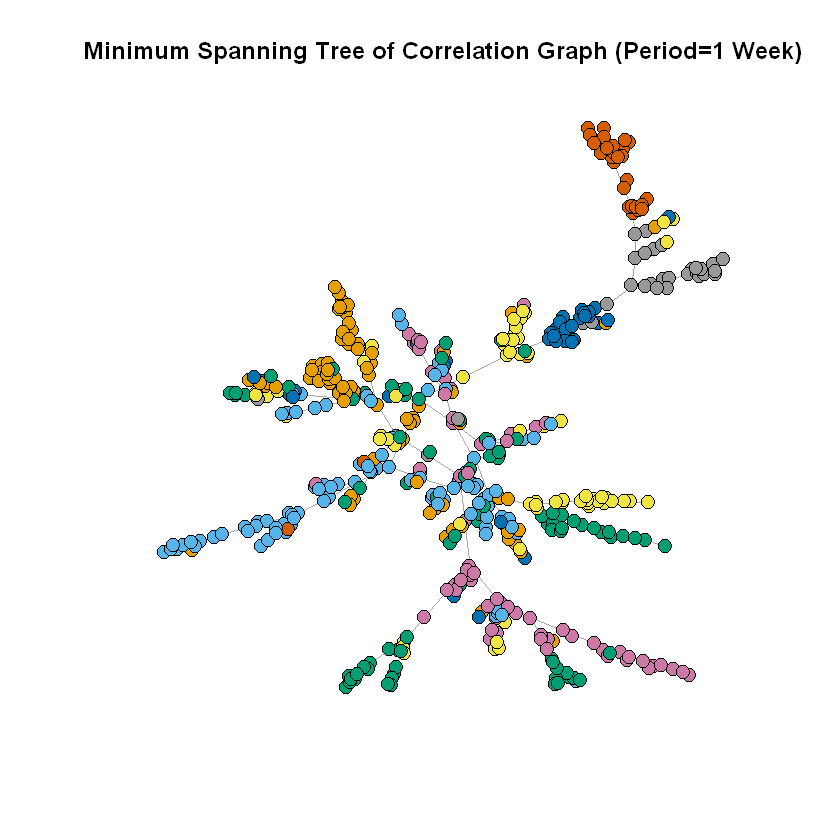

In [170]:
map_color_week <- unlist(V(mst_week)$color)
plot(mst_week, edge.arrow.size=.5, 
    vertex.color=map_color_week, vertex.size=5, vertex.label="", #mark.col = seq(1:max(cinfo_map_color)),
    main=paste("Minimum Spanning Tree of Correlation Graph (Period=1 Week)",collapse=""))
